In [1]:
# Set to show plots inline
%matplotlib inline

# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# generate empty dataframe, assign data types
df = pd.DataFrame(data=None,columns=['Fuel','MW'])
df = df.astype(dtype={'Fuel':'category', 'MW':'float'})

# create and seed a randomstate object (to make #s repeatable below)
rnd = np.random.RandomState(2)

mymean = 3 # starting mean value for use in the distribution below
mysigma = 0.8 # sigma value for use in the distribution below
myfuels = ['Bio','Coal','Hydro','Gas','Oil','Solar','Wind','Other'] # categories
mysize = 1000 # number of data points per category

# Loop through categories. For each, generate fake data and append to df.
for myfuel in myfuels:
    myMWs = list(rnd.lognormal(mean=mymean,sigma=mysigma,size=mysize)) # random generated data
    # Massage data into a new temporary dataframe, created from a dict based on the data
    newdata = pd.DataFrame({'Fuel': [myfuel]*mysize,
                           'MW':  myMWs})
    
    # Append the temporary dataframe to df
    df = df.append(newdata,
                   ignore_index=True # this prevents the index numbers from duplicating
                  )    
    
    # Increment the value of mymean, to create categorical data with different distributions
    mymean = mymean + 0.4

# view a sample of the created data
df.sample(10,random_state=rnd)

,Fuel,MW
5113,Solar,148.975232
4174,Oil,94.548511
7889,Other,286.424550
4689,Oil,109.976712
269,Bio,6.361634
3543,Gas,145.279778
2804,Hydro,91.862229
4162,Oil,174.291522
548,Bio,17.357104
3396,Gas,78.231988


In [3]:
# See info on our data.  If everything is working, should have mysize values for each category,
# in each column.  So if mysize = 1000 and there are 8 categories, then both Fuel and MW should
# have 8000 values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 2 columns):
Fuel    8000 non-null object
MW      8000 non-null float64
dtypes: float64(1), object(1)
memory usage: 125.1+ KB


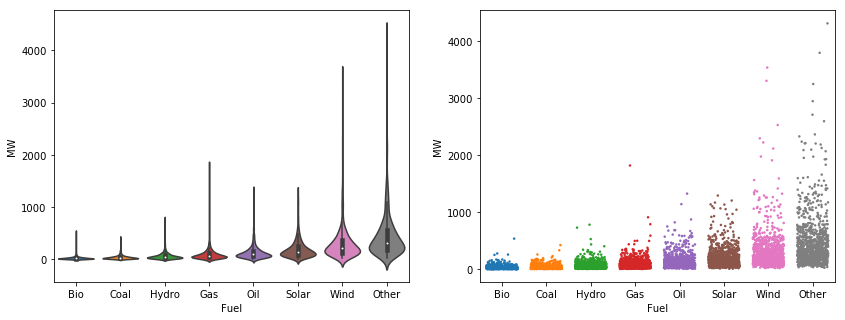

In [4]:
# see distribution of created data

# Set up figure and axes
fig1, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
    
# make violinplot
sns.violinplot(x = 'Fuel',
               y = 'MW',
               data=df,
               scale='width',
               ax = ax1
              )   


sns.stripplot(x = 'Fuel',
               y = 'MW',
               data=df,
               jitter=0.35,
               size=2.5,
               ax = ax2
              )   

plt.show()